### ML project 


## Part 1: DATA EXPLORATION



In [1]:
#importing pandas, matplotlib and numpy libraries.
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion,Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,GridSearchCV,train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, plot_roc_curve,plot_confusion_matrix
from sklearn.feature_selection import VarianceThreshold,RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from numpy import interp
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#define the csv file as X_train.
#Checking the dataset info and the features types.
#View a small portion of the data.
X = pd.read_csv('feature_data.csv')
print(X.shape)
y = pd.read_csv('label_data.csv')
y = y['cancelation']
X_test = pd.read_csv('feature_data_test.csv')

(89542, 34)


In [3]:
#split into train and test(validation)
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size=0.3,stratify=y ,random_state=42)

In [4]:
#Let's take a look at the features' statistics, such as mean, std, count.
X_train.describe(include = 'all')
#We inferred from the count row that there are missing values in some of the features.

,Unnamed: 0,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
count,62679.000000,53744.000000,62679.000000,60246,62679,62679.000000,62679.000000,62676.000000,62679.000000,59636,...,62679.000000,59866.000000,59748.000000,59770.000000,62679.000000,60057.000000,60769.000000,59223.000000,62679,4011.000000
unique,NaN,NaN,NaN,12,53,NaN,NaN,NaN,NaN,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,August,week_33,NaN,NaN,NaN,NaN,PRT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
freq,NaN,NaN,NaN,7031,1890,NaN,NaN,NaN,NaN,24321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31465,NaN
mean,59904.252908,103.678420,2016.159288,NaN,NaN,15.828986,1.856316,0.103740,0.007834,NaN,...,0.991193,1.330471,2.375460,0.062941,0.571978,0.334416,0.426443,8.854694,NaN,0.370481
std,34521.690348,106.776942,0.708332,NaN,NaN,8.780041,0.547877,0.399071,0.089240,NaN,...,1.696485,1.880174,17.471608,0.244096,0.795130,0.471790,0.128257,5.233335,NaN,0.482994
min,4.000000,0.000000,2015.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162005,0.038632,NaN,0.000000
25%,30011.000000,18.000000,2016.000000,NaN,NaN,8.000000,2.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327103,4.471688,NaN,0.000000
50%,60016.000000,69.000000,2016.000000,NaN,NaN,16.000000,2.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424607,8.426605,NaN,0.000000
75%,89866.000000,159.000000,2017.000000,NaN,NaN,23.000000,2.000000,0.000000,0.000000,NaN,...,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.510496,12.704154,NaN,1.000000


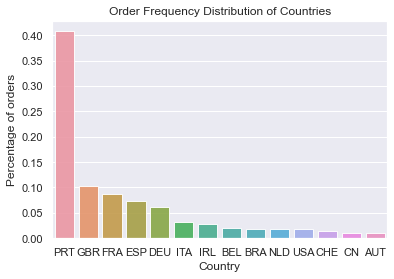

In [5]:
# X_train[['country']] = X_train[['country']].fillna(value = 'OTHER')

country_count = X_train['country'].value_counts(normalize = True)
country_count = country_count[country_count > 0.01] # countries with frequencies under this threshold do not represent the data 
sns.set(style = "darkgrid")
sns.barplot(country_count.index, country_count.values, alpha = 0.9)
plt.title('Order Frequency Distribution of Countries')
plt.ylabel('Percentage of orders', fontsize = 12)
plt.xlabel('Country', fontsize = 12)
plt.show()

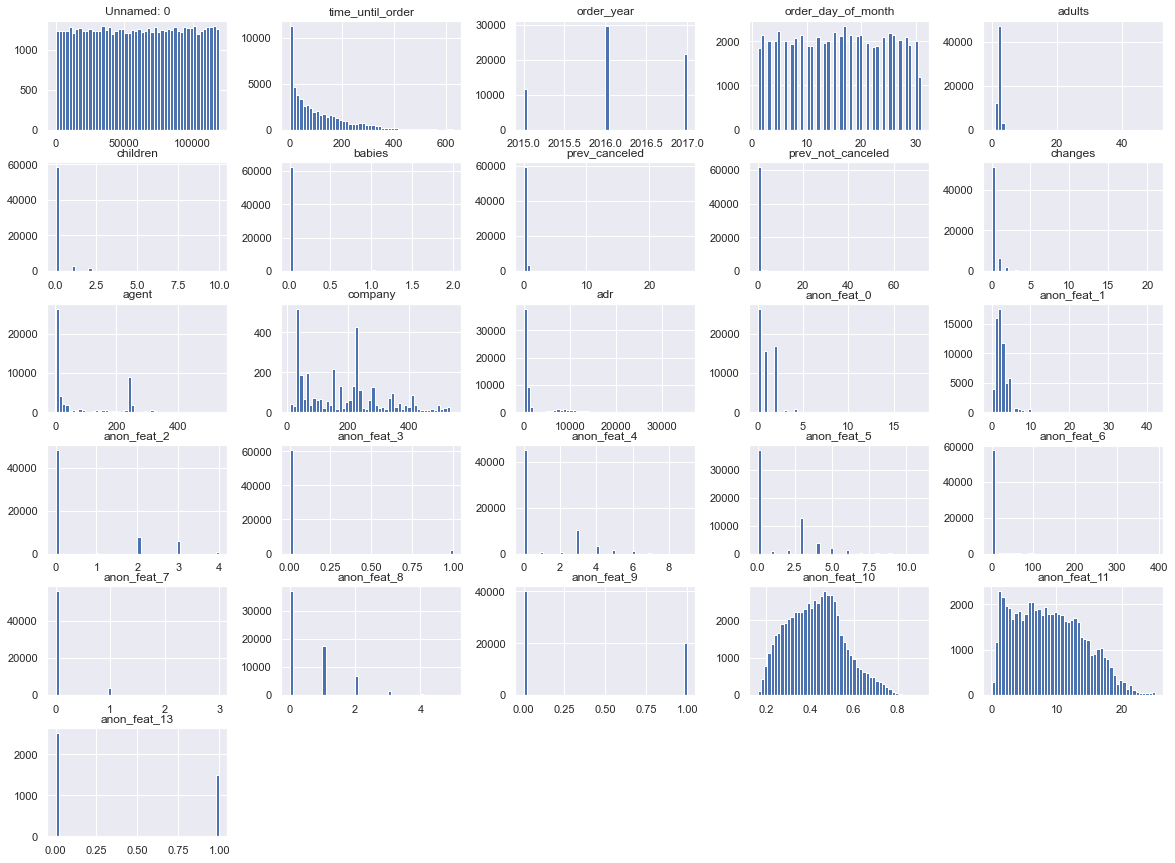

In [6]:
numeric_features = X_train.select_dtypes(include=np.number)
numeric_features.hist(bins=50,figsize=(20,15))
plt.show()

We can see that we have quite a few sparse features which we may want to remove because they wont add much to our data if they dont contribute meaningful information 

<AxesSubplot:>

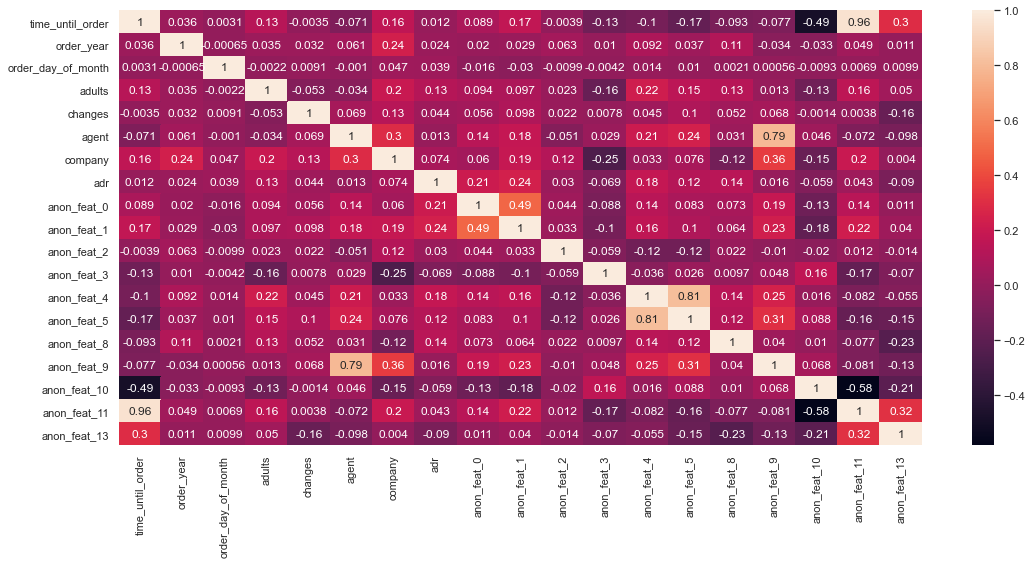

In [7]:
corr_mat=numeric_features.drop(['prev_not_canceled','prev_canceled','babies','children','anon_feat_6',\
                    'anon_feat_7','Unnamed: 0'],axis=1,inplace=False) ## removing sparse features for cleaner plot 
corr_mat = corr_mat.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr_mat,annot=True)


We notice that time_until_order is highly correlated with anon_feature_11 , and that anon_feat_5 correlates highly with anon_feat_4 ,as does agent with anon_feat_9

###### Lets check correlations between features and our label data:

In [8]:
X_train.corrwith(y).sort_values(ascending=False)

anon_feat_13          1.000000
anon_feat_11          0.313683
time_until_order      0.294366
prev_canceled         0.110757
anon_feat_6           0.059325
adults                0.057988
anon_feat_1           0.025495
order_year            0.011501
children              0.004363
company               0.001678
anon_feat_12         -0.003437
anon_feat_0          -0.003838
order_day_of_month   -0.009120
anon_feat_2          -0.017354
babies               -0.031103
prev_not_canceled    -0.059963
anon_feat_4          -0.062781
adr                  -0.072934
anon_feat_3          -0.081338
agent                -0.082948
anon_feat_9          -0.134448
changes              -0.143996
anon_feat_5          -0.177612
anon_feat_7          -0.197923
anon_feat_10         -0.203986
anon_feat_8          -0.235674
Unnamed: 0           -0.246825
dtype: float64

In [9]:
X_train['anon_feat_13'].isna().sum()

58668

As we can see , although anon_feat_13 is perfectly correlated with our label data, it contains over 90% missing values , so it may not be that informative for us 

#### Visualizing Categorical data

order_month :
August       7031
July         6382
May          5991
October      5649
April        5562
June         5517
September    5296
March        4999
February     4022
November     3440
December     3389
January      2968
Name: order_month, dtype: int64
order_month  contains  13  labels


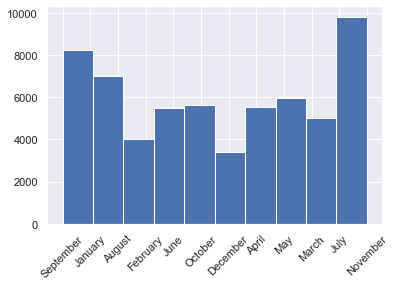

order_type :
Online TA        29692
Offline TA/TO    12741
Groups           10368
Direct            6623
Corporate         2740
Complementary      386
Aviation           127
Undefined            2
Name: order_type, dtype: int64
order_type  contains  8  labels


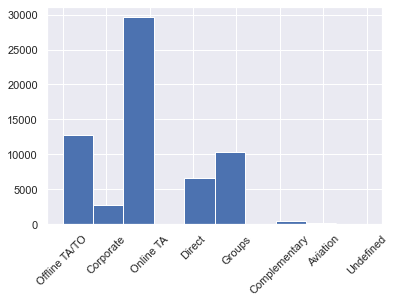

acquisition_channel :
TA/TO        51427
Direct        7693
Corporate     3462
GDS             94
Undefined        3
Name: acquisition_channel, dtype: int64
acquisition_channel  contains  5  labels


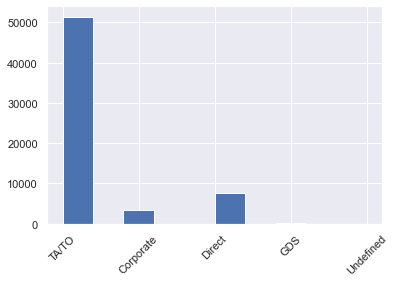

deposit_type :
No Deposit    49324
Non Refund     6968
Refundable       85
Name: deposit_type, dtype: int64
deposit_type  contains  4  labels


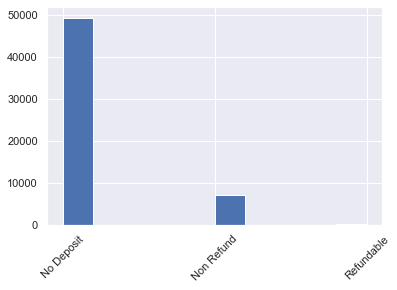

customer_type :
Transient          41958
Transient-Party    11668
Contract            1860
Group                258
Name: customer_type, dtype: int64
customer_type  contains  5  labels


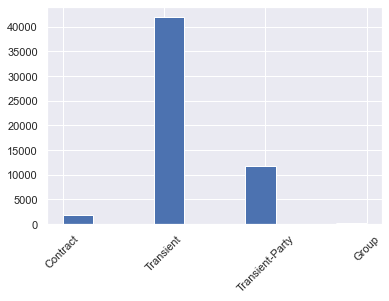

In [10]:
#Categorical Features

cat_features = X_train.select_dtypes(exclude=np.number)
cat_features.columns

### categorical preprocessing
for category in cat_features:
    if category not in ['country', 'order_week','anon_feat_12']:
        print (category + " :")
        print(X_train[category].value_counts())
        print(category, ' contains ', len(X_train[category].unique()), ' labels')
        X_train[category].hist()
        X_train[category].unique()
        plt.xticks(rotation = 45)
        plt.show()

## Pre-processing

### Feature Engineering:

#### Mathematical Transformation of Date features
We know that month/day of month are cyclical by nature, for ex: month 1 comes after month 12, however the classifiers we use assume that these features are linear (as in month 1 is really far from month 12). We would like our classifiers to be able to better utilize this data , therefore we will transform these features so they will have cyclical order.In order to accomplish this we can utilize the cyclical nature of the sine and cosine functions (if we only used sine then there would be two values for any given line across the graph , therefore we need use both sine/cosine to negate that effect). for this we wil generate 2 new columns to replace each time period

$x=\sin \frac{2\pi \cdot time\hspace{1mm}period\hspace{1mm}_i}{total\hspace{1mm}time\hspace{1mm}periods}$ 

$y=\cos \frac{2\pi \cdot time\hspace{1mm}period\hspace{1mm}_i}{total\hspace{1mm}time\hspace{1mm}periods}$

In [11]:
# convert month name to month number e.g. Jan=1,feb=2..
X_train['order_month'] = pd.to_datetime(X_train.order_month, format='%B').dt.month 
X_val['order_month'] = pd.to_datetime(X_val.order_month, format='%B').dt.month 
X_test['order_month'] = pd.to_datetime(X_test.order_month, format='%B').dt.month 

In [12]:
# Create Function to implement the date variable manipulations
def cyclic_date(df):
    # mathematical transformation to account for cyclic nature of months in a year
    df['sin_month'] = np.sin(2*np.pi*df.order_month/12)
    df['cos_month'] = np.cos(2*np.pi*df.order_month/12)
    # same thing for day of month
    df['sin_day_of_month'] = np.sin(2*np.pi*df.order_day_of_month/30)
    df['cos_day_of_month'] = np.cos(2*np.pi*df.order_day_of_month/30)
    
    df.drop(['order_month','order_day_of_month'],axis=1,inplace=True)
    return df
DateTransformer = FunctionTransformer(cyclic_date) # convert to transformer for future pipeline use


###### We can visualize this cyclical transformation 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


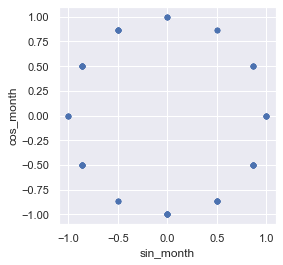

In [13]:
X_copy = X_train.copy(deep=True)
X_copy = cyclic_date(X_copy)
X_copy.sample(150).plot.scatter('sin_month','cos_month').set_aspect('equal');

##### Numeric preprocessing 

In [14]:
# Custom Transformer to drop columns
# first we create the function to be applied to our data
def DropCols(df):
    df.drop(['Unnamed: 0','prev_not_canceled','prev_canceled','babies','children',
             'anon_feat_6','anon_feat_7'],axis=1,inplace=True)  
    return df 
# then we convert the function into a custom transformer
DropCols = FunctionTransformer(DropCols) 

##### Pipelines:
We have chosen to utilize Sklearns Pipeline object to chain together our preprocessing/feature engineering so that we may avoid repeat coding, and also to ensure we dont miss any steps when applying our preprocessing to our final test data

In [15]:
# define individual transformers in a pipeline
numeric_preprocessing = Pipeline(steps=[         
    ('convert_date',DateTransformer), # sin/cosin trasformation of date features
    ('drop_cols',DropCols), # dropping uneccesary columns
    ('variance_thresh',VarianceThreshold(threshold=0.25)), # remove low variance features
    ('imputer', SimpleImputer(strategy='mean')), # impute missing values with the mean of the column
    ('scaler', StandardScaler()), # scaling our data 
    ('pca',PCA())]) # applying pca for dimensionality reducution 



##### Using PCA for dimensionality reduction
To avoid the curse of dimensionality , we shall plot the pca explained variance ratio so that we can select a subset of features taht will accurately represent our data

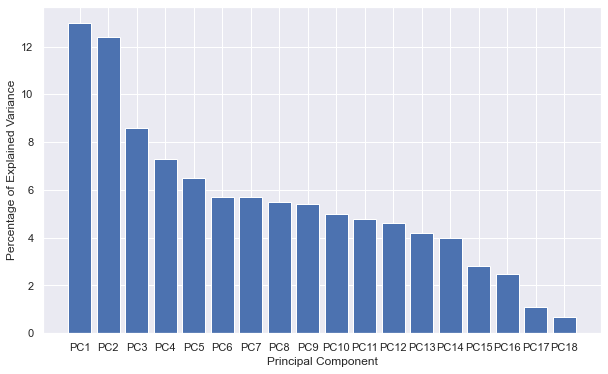

In [16]:
#----plotting pca explained variance
X_copy = X_train.copy(deep=True)
numeric_features = X_copy.select_dtypes(include=np.number)
numeric_preprocessing.fit_transform(numeric_features)

per_var = np.round(numeric_preprocessing['pca'].explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize = (10,6)) 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

#----trying to print names of most important components

# index =[f'PC {str(i)}' for i in range(13)]
# print(pd.DataFrame(pca.components_,columns=num_feature_names, index =index))

Or, another way to look at it is the cumulative explained variance we recieve from a given amount of components

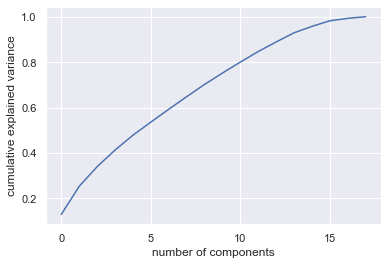

In [17]:

plt.plot(np.cumsum(numeric_preprocessing['pca'].explained_variance_ratio_)) #plot cumulative explained variance 
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.locator_params(axis="both", integer=True, tight=True)
plt.show()

As we can see from the plot above , we can explain about 99% of the variance in our numeric data with the first 15 principal components , so we'll select 15 principal components in our final pipeline to reduce dimension while retaining over 99% of the variance 

In [18]:
numeric_preprocessing.set_params(pca__n_components=15)

Pipeline(steps=[('convert_date',
                 FunctionTransformer(func=<function cyclic_date at 0x000001E817885F70>)),
                ('drop_cols',
                 FunctionTransformer(func=<function DropCols at 0x000001E8187CF160>)),
                ('variance_thresh', VarianceThreshold(threshold=0.25)),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=15))])

##### Categorical preprocessing
For our categorical features , we again will utilize Pipeline to chain togther our preprocessing steps which include imputing missing values and encoding with dummy variables.

In [19]:
cat_features = X_copy.select_dtypes(exclude=np.number)
cat_vars = cat_features.columns
### categorical preprocessing
#missing values
total = X_train[cat_vars].isnull().sum().sort_values(ascending=False)
percent = (X_train[cat_vars].isnull().sum()/X_train[cat_vars].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data


,Total,Percent
customer_type,6935,11.064312
deposit_type,6302,10.054404
country,3043,4.854896
order_week,0,0.000000
order_type,0,0.000000
acquisition_channel,0,0.000000
anon_feat_12,0,0.000000


In [20]:
#filling the nan values with random values
#['order_week', 'country', 'order_type', 'acquisition_channel', 'deposit_type', 'customer_type'
def fill_na_random(df):
    for column in df.columns:
        df[column] = df[column].apply(lambda x: np.random.choice(df[column].dropna().values) 
                                      if pd.isnull(x) else x)
    return df
FillRand = FunctionTransformer(fill_na_random) # convert function to transformer for pipeline use

# def fill_na_mode(df):
#     df = df.fillna(df.mode().iloc[0])
#     return df
# FillMode = FunctionTransformer(fill_na_mode)

In [21]:
# define the categorical preprocessing steps in a pipeline
categorical_preprocessing = Pipeline(steps = [('fill_rand',FillRand),
                                             ('ohe',OneHotEncoder(categories='auto',handle_unknown='ignore'))])

In [22]:
# defining which transformer applies to which columns

num_feature_names = X_train.select_dtypes(include=np.number).columns
cat_feature_names = cat_vars
preprocess = ColumnTransformer([
    ('numeric_preprocessing', numeric_preprocessing,
     num_feature_names),
    ('categorical_preprocessing', categorical_preprocessing, 
     cat_feature_names)
])


In [23]:
ids = X_test['Unnamed: 0'] # get ids for later use in submission process

X_train=preprocess.fit_transform(X_train) # fit preprocessing to our train data:

X_val= preprocess.transform(X_val) # transform our validation / test data

X_test = preprocess.transform(X_test)


## Model selection and Testing

#### Fitting the models to our training data

In [24]:
### our 2 simple classifiers

reg = LogisticRegression() # TODO hyperparameters
knn = KNeighborsClassifier(n_neighbors=20, weights="uniform", metric="euclidean",algorithm= "brute")

### our 2 advanced classifiers
rf = RandomForestClassifier(n_estimators =100,max_depth=10,n_jobs=-1) # hyperparameters: limit trees to 100,depth of each tree to 10 
mlp = MLPClassifier()

clfs = [reg, knn, rf, mlp]

#fit each classifier to our training data:
for clf in clfs:
    clf.fit(X_train,y_train)


##### Confusion Matrix 


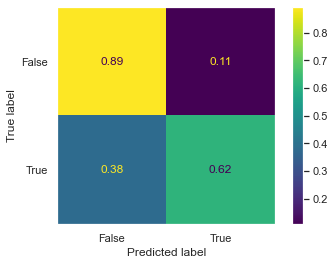

In [28]:

plot_confusion_matrix(reg,X_train,y_train,normalize='true')
plt.grid(False)
plt.show()

From the plot above we can see that the classifier correctly identified 89% of True negatives(top left) as well as  62% of True Positives(bottom right)

The top right cell represents the missclassified negatives(False Positives) and the bottom left cell represents the misclassified positives (False Negatives)

##### Now we will test out 4 different classifiers to see which one has the greatest prediction accuracy
We'll start by creating helper functions for plotting

In [30]:
def KfoldPlot(X, y, clf, k,ax=None):
    
    #str(clf) returns the name of the classifier, we set this as the title.
    clfname = str(clf)[:str(clf).find("(")]
    
    #We prepare a figure, which will be filled in with some graphs inside.
    plt.figure()
    
    if(ax is None):
        ax=plt.gca()
    
    kf = KFold(n_splits=k, shuffle=False)

    mean_tpr = np.zeros(100)
    mean_fpr = np.linspace(0, 1, 100)

    i=1

    for train_index, validation_index in kf.split(X):
        
        #Splitting into train and validation, based on the current fold.
        X_train, X_validation = X[train_index], X[validation_index]
        y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]

        #fit with X_train and y_train.
        clf.fit(X_train, y_train)
        
        prob_prediction = clf.predict_proba(X_validation)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_validation, prob_prediction)
        
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        
        ax.plot(fpr, tpr, color='#D3D3D3')
        i+=1
    
    ax.plot([0], [0], color='#D3D3D3', linestyle='-', label='K-folds')    
    

    mean_tpr /= k
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    #plot the random-guess line
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
    # plot the mean roc
    ax.plot(mean_fpr, mean_tpr, color='red', linestyle='-', label='Mean ROC (area = %0.3f)' % mean_auc)

    #Setting some boundaries and adding a legend
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC for ' + clfname)
    ax.legend(loc="lower right")
#     plt.show()
    return ax

In [31]:
def eval_models(X,y,clfs,folds):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes=[ax1,ax2,ax3,ax4]
    for ax, clf in zip(axes, clfs):
        KfoldPlot(X,y,clf,folds,ax=ax)
    plt.show()
    

In [31]:
def validate_models(X_val,y_val,clfs):
#     for clf in clfs:
#         clf.fit(X_train,y_train) # fit to entire train set
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axes=[ax1,ax2,ax3,ax4]
    for ax, clf in zip(axes, clfs):
        plot_roc_curve(clf,X_val,y_val,ax=ax)
    plt.show()
    

#### Plot K Fold CV with ROC for each of the 4 models

First we'll plot using the training data:

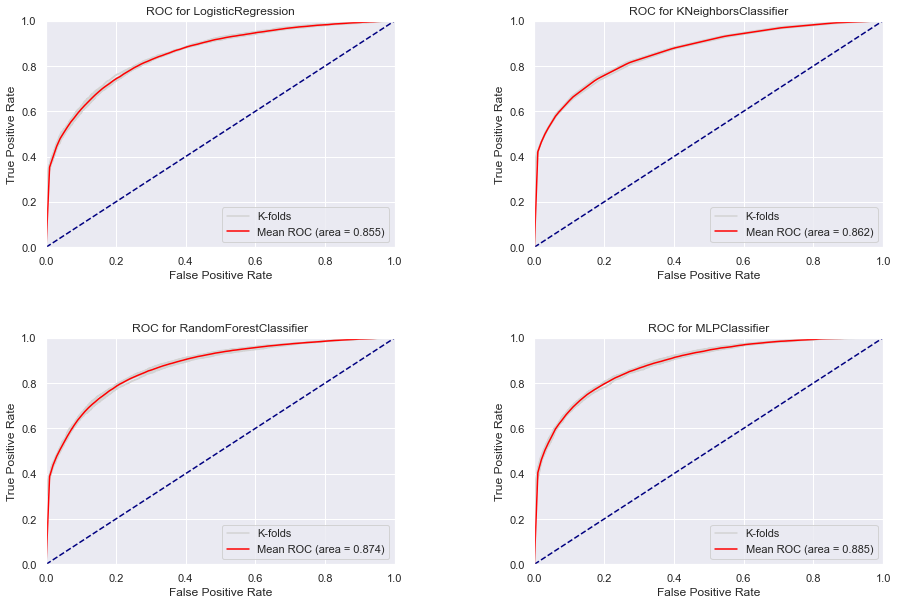

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [33]:
eval_models(X_train,y_train,clfs,5)

Next , we'll plot using the validation data to check if our models are overfitting

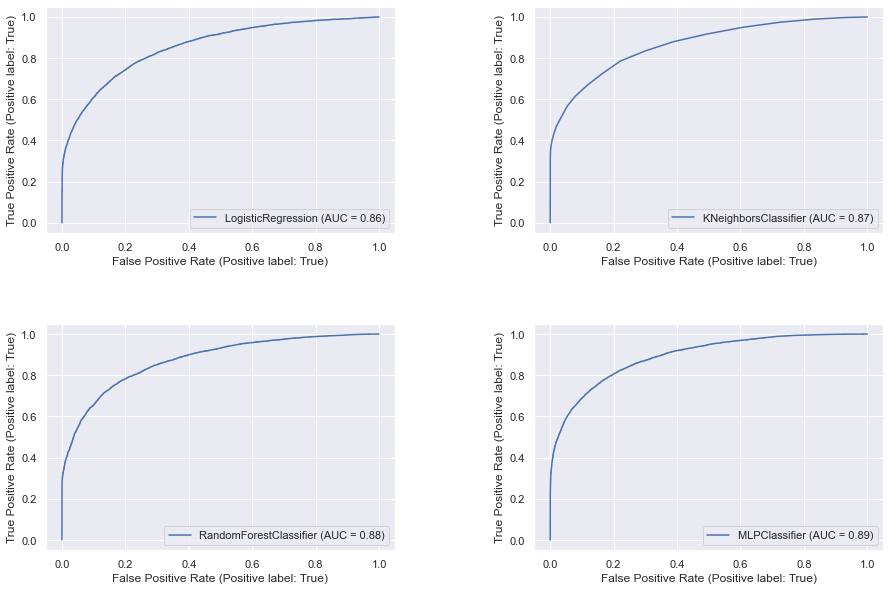

In [32]:
validate_models(X_val,y_val,clfs)

As we can see from the above plots, We are not overfitting our data because when we applied each classifier to the validation data, we recieved very similar AUC scores as we did with the training data, therefore , we can conclude that our models will perform similarly on other unseen data. Based on this plot we can see that indeed the MLPClassifier was the highest scoring model and therefore we shall select it for our final predictions.